![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [5]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
# Start coding here
# Feel free to add as many cells as you want


# Parameters for training
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001
alpha = 0.1  # Learning rate
gamma = 1 # Discount factor


# Determine the environment's number of states and actions
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the Q-table with zeros
q_table = np.zeros((num_states, num_actions))

# Epsilon-greedy strategy function
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

    
# Q-learning update function
def q_learning_update(state, action, reward, next_state):
    old_value = q_table[state, action]
    next_max = max(q_table[next_state]) 
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

# List to store the total reward per episode
episode_returns = []

# Training loop
for episode in range(2000):
    state, info = env.reset()
    terminated = False
    total_reward = 0

    for i in range(max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        q_learning_update(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if terminated:
          break
          
    episode_returns.append(total_reward)
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon*epsilon_decay)

# Deriving the policy    
policy = {state: np.argmax(q_table[state]) for state in range(num_states)} 

## Testing the agent's behavior

# List to store frames
frames = []
state, info = env.reset(seed=42)
frames.append(env.render())
episode_total_reward = 0
for i in range(16): # Execute maximum 16 moves
    action = policy[state] 
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    if terminated:
      break      

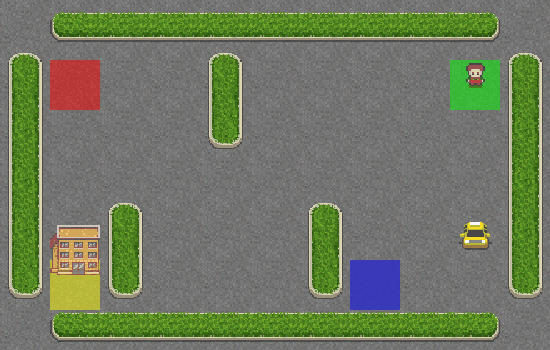

In [7]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 